# Challenge: Preparing a dataset for modeling

I analyze the identical dataset, the Ames Housing Datset compiled by Dean De Cock from [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

In [2]:
# import the train dataset into pandas dataframe
train = pd.read_csv('./Data/AmesHousingDataset/train.csv')
print(train.shape)

(1460, 81)


In [3]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

There are 81 columns including dependent variable, "SalePrice" and index variable "Id" with 1460 cases. I drop "Id" colum from the dataset.

In [4]:
train_Id = train.Id
train.drop('Id', axis=1, inplace=True)

### Using a dataset of your choice, select an outcome variable and then pick four or five other variables (one to two categorical, three to four continuous) to act as the basis for features.
### Next, based on what you learned via your data exploration, create ten new features. Explain the reasoning behind each one.
### Finally, use filtering methods to select the five best features and justify your choices.

** * SalePrice, the dependent variable **

First, the dependent(outcome) varialbe, "SalePrice" is analyzied. "Sale Price" means the property's sale price in dollars. This is the target variable that I am trying to predict.

In [5]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Among the descriptive statistics, we can see that its mean and median are different and the distibution is positive skewed.

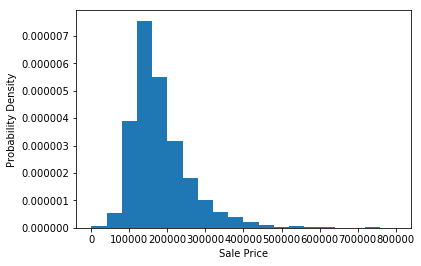

In [6]:
plt.hist(train['SalePrice'], bins = 20, range= (0,800000), normed =  True)
plt.xlabel('Sale Price')
plt.ylabel('Probability Density')
plt.show()

The non-normal variable, "SalePricE", can be transformed taking the square root, the inverse, or the log of variable

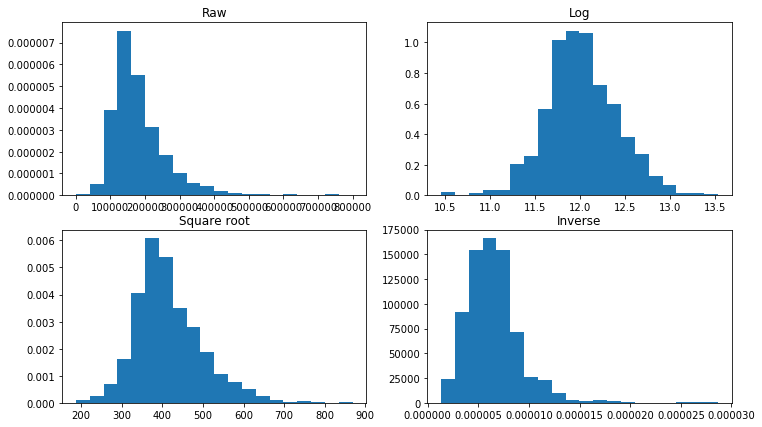

In [7]:
fig, axes = plt.subplots(2,2, figsize=(12,7))

axes[0,0].hist(train['SalePrice'], bins = 20, range= (0,800000), normed =  True)
axes[0,0].set_title('Raw')

axes[0,1].hist(np.log(train['SalePrice']), bins = 20, normed =  True)
axes[0,1].set_title('Log')

axes[1,0].hist(np.sqrt(train['SalePrice']), bins = 20, normed =  True)
axes[1,0].set_title('Square root')

axes[1,1].hist(1/(train['SalePrice']), bins = 20, normed =  True)
axes[1,1].set_title('Inverse')

plt.show()

Among the transformations, the logarithmic 'SalePrice' seems close to normal-distrubtion, we can draw QQplot on the logarithmic variable. 

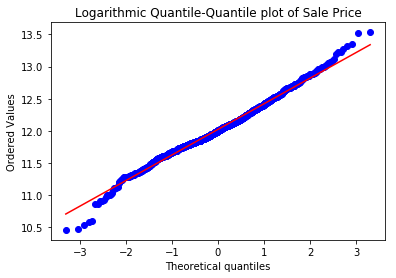

In [8]:
stats.probplot(np.log(train['SalePrice']), dist='norm', plot=plt)
plt.title('Logarithmic Quantile-Quantile plot of Sale Price')
plt.show()

I decide to utilize the loagarithmic as a target variable.

In [9]:
# Generate a new column, LSalePrice in the train dataset
train['LSalePrice'] = np.log(train['SalePrice'])
# Drop the 'SalePrice' column
train.drop('SalePrice', axis = 1, inplace = True)

Next, How can we select continuous and categorical parameters to build a set of feature? For, the continuous variables we can "score" them as their correlation with the dependent variable, 'LSalePrice'.

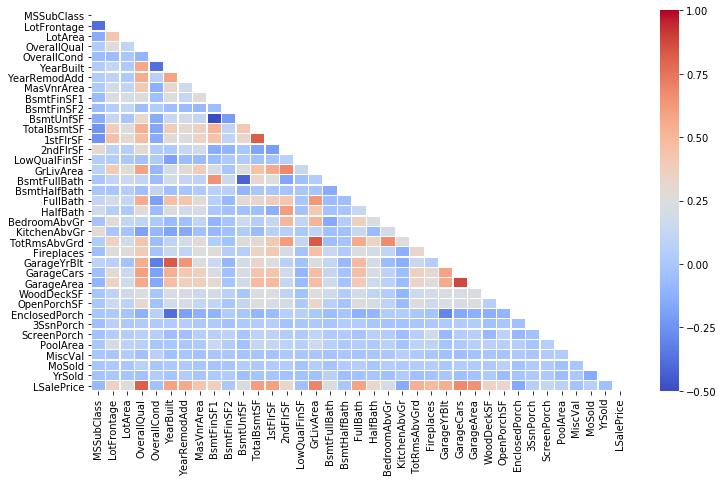

In [10]:
# Compute the correlation Matrix 
corr_train = train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_train, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot heatmap 
plt.subplots(figsize=(12,7))
sns.heatmap(corr_train, mask=mask, cmap='coolwarm', vmin = -0.5, vmax = 1.0, linewidth = 0.3)
plt.show()

To compare each level of correlation with 'LSalePrice', let's arrange the index in the matrix by sorting the values in the first column.

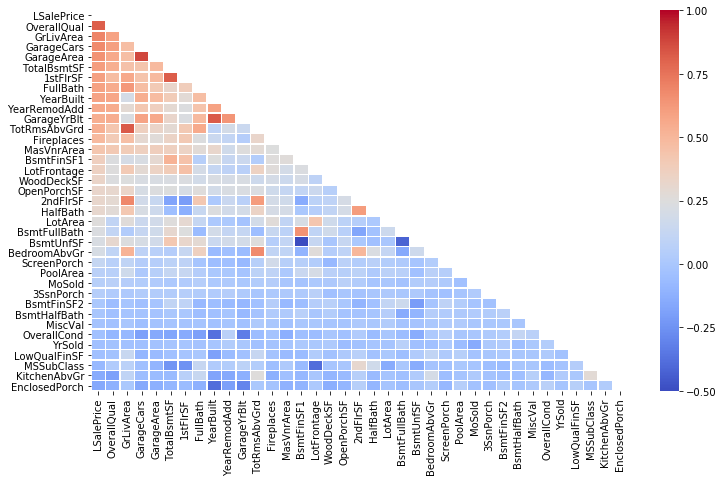

In [11]:
Sort_corr_cols = corr_train['LSalePrice'].sort_values(ascending=False).drop(['LSalePrice']).index
Sort_corr_cols = list(Sort_corr_cols)
Sort_corr_cols.insert(0,'LSalePrice')

plt.subplots(figsize=(12,7))
sns.heatmap(train[Sort_corr_cols].corr(), 
            mask=mask, cmap='coolwarm', vmin = -0.5, vmax = 1.0, linewidths=0.3)
plt.show()

We can sort filter the continuous varialbe with the threshold, 0.5 correlation with 'LSalePrice'

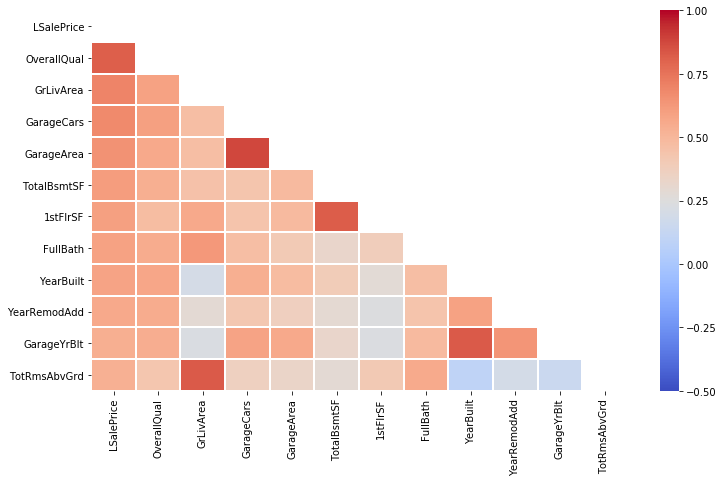

In [12]:
Sort_corr_cols_higher05 = corr_train['LSalePrice'][corr_train['LSalePrice']>0.5].sort_values(ascending=False).drop(['LSalePrice']).index
Sort_corr_cols_higher05 = list(Sort_corr_cols_higher05)
Sort_corr_cols_higher05.insert(0,'LSalePrice')

top_corr_train = train[Sort_corr_cols_higher05].corr()

mask = np.zeros_like(top_corr_train, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.subplots(figsize=(12,7))
sns.heatmap(top_corr_train, mask=mask, cmap='coolwarm', vmin = -0.5, vmax = 1.0, linewidths=1)
plt.show()

* OverallQual

We can see that top 11 correlated parameters witih "LSalePrice" with descending order. Among the top 11 parameters, we can check "OverallQual" at first, the most correlated one.

In [24]:
train['OverallQual'].describe()

count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64

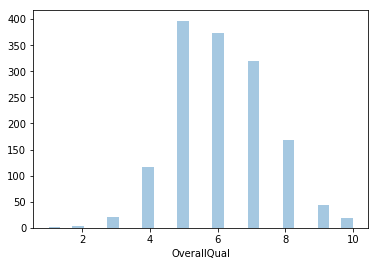

In [23]:
sns.distplot(train['OverallQual'], kde=False)
plt.show()

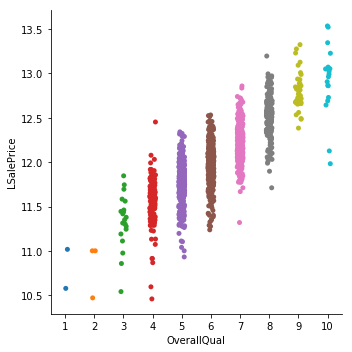

In [13]:
sns.catplot(x='OverallQual', y='LSalePrice', data=train)
plt.show()

We can recognize the linear relationship between 'LSalePrice' and 'OverallQual', so, I decide to select it as feature in modeling.

In [15]:
features= pd.DataFrame(train['OverallQual'])

** * 'GrLivArea' and the other living area parmeters **

The second correlated variable with 'LSalePrice' seems the summation of '1stFlrSF' and '2ndFlrSF', so 

In [44]:
train['GrLivArea'].describe()

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64

[]

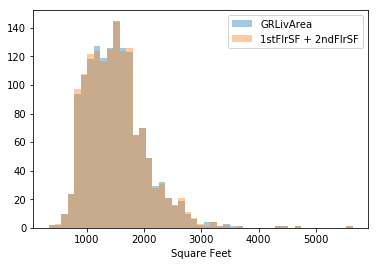

In [41]:
sns.distplot(train['GrLivArea'], kde=False)
sns.distplot(train['1stFlrSF'] + train['2ndFlrSF'], kde=False)
plt.legend(('GRLivArea', '1stFlrSF + 2ndFlrSF'))
plt.xlabel('Square Feet')
plt.plot()

And, because it is also positivley skewed like 'SalePrice', I tranformed it logarithmically.

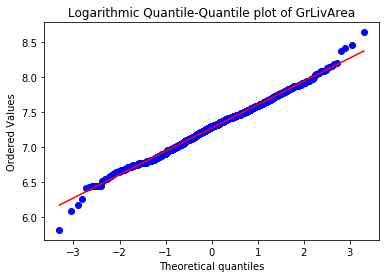

In [43]:
stats.probplot(np.log(train['GrLivArea']), dist='norm', plot=plt)
plt.title('Logarithmic Quantile-Quantile plot of GrLivArea')
plt.show()

Let's draw scatter plot with 'LGrLivArea' and 'LSalePrice', I see the strong linear relationsihp between the two variables.

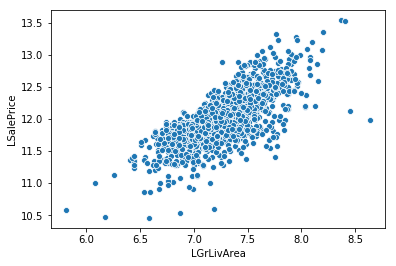

In [60]:
train['LGrLivArea'] = np.log(train['GrLivArea'])
sns.scatterplot(x='LGrLivArea', y='LSalePrice', data=train)
plt.show()

Therefore, I decide to add 'LGrLivArea' into 'features' dataframes except '1stFlrSF'. However, there is some outliers.

In [59]:
features['LGrLivArea'] = train['LGrLivArea']

How about '2ndFlrSF'?? There are lots of case without any value in '2ndFlrSF', that means these house do not have just 1nd floor structure.

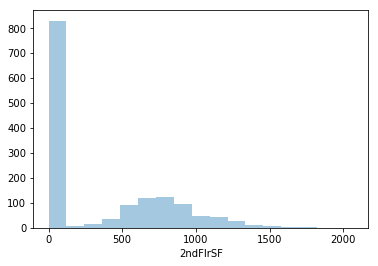

In [61]:
sns.distplot(train['2ndFlrSF'], kde=False)
plt.show()

There are lots of case only with 1st Floor. Let's draw the scatterplot now.

[]

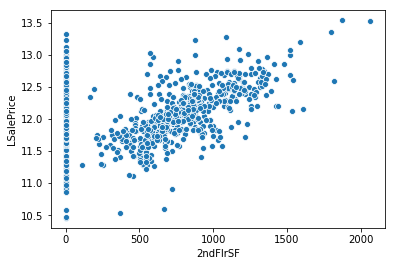

In [73]:
sns.scatterplot(x='2ndFlrSF', y='LSalePrice', data=train)
plt.plot()

It shows us that the logarithmic sale price are related to the 2nd floor area when it is a 2nd Floor structure.

In [71]:
train['Is2ndFlr'] = train['2ndFlrSF'] !=0

When we divide the cases as two groups whether it is 2nd floor or not, there is statistical difference between them based on the t-test.

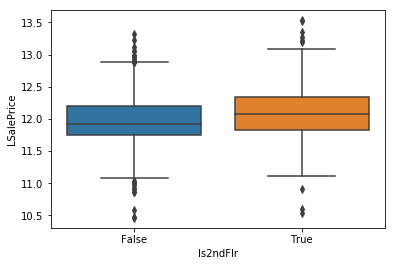

Ttest_indResult(statistic=5.8172094911530676, pvalue=7.4524828572702347e-09)

In [110]:
sns.boxplot(x='Is2ndFlr', y='LSalePrice', data=train)
plt.show()
# t-test on two group, only 1st floor or 2nd Floor
stats.ttest_ind(train.loc[train['Is2ndFlr']==1]['LSalePrice'], train.loc[train['Is2ndFlr']==0]['LSalePrice'], equal_var=False)

Therefore, I append the categorical varialbe 'Is2ndFlr' to 'features'.

In [111]:
features['Is2ndFlr'] = train['Is2ndFlr']

Isn't there any relationship between the 2nd floor area and sale price? In the case of 2nd floor house, the 2nd floor area has linear relationship with 'LSalePrice'

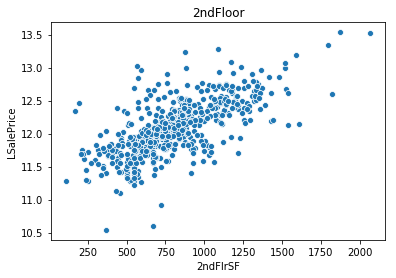

In [105]:
sns.scatterplot( x='2ndFlrSF', y='LSalePrice', data = train.loc[train['Is2ndFlr']==1])
plt.title('2ndFloor')
plt.show()

So, I add '2ndFlrSF' as features

In [113]:
features['2ndFlrSF'] = train['2ndFlrSF']

How about, 'TotalBsmtSF', Total square feet of basement area?

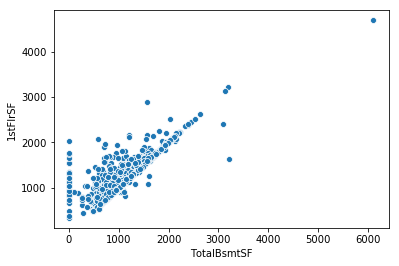

In [150]:
sns.scatterplot(x = 'TotalBsmtSF', y='1stFlrSF', data=train)
plt.show()

We can see that 'TotalBsmtSF' and '1stFlrSF' are almost linearly related. So, I filter it out.

** * 'GarageCars' and 'GarageArea' **

'GarageCars', size of garage in car capacity, and 'GarageArea', size of garage in square feet, are correlated.

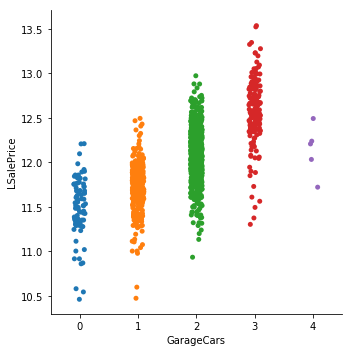

In [147]:
sns.catplot(x='GarageCars', y='LSalePrice', data = train)
plt.show()

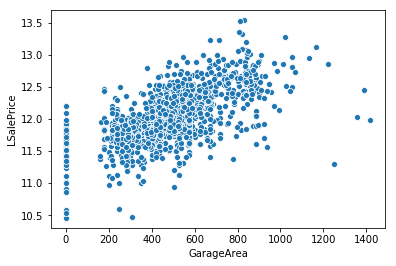

In [148]:
sns.scatterplot(x='GarageArea', y='LSalePrice', data = train)
plt.show()

PCA??? Give me a hint!!!!

I decide to only append 'GarageCars', why??? I am not sure...  

In [141]:
features['GarageCars'] = train['GarageCars']

** * 'FullBath', Full bathrooms above grade **

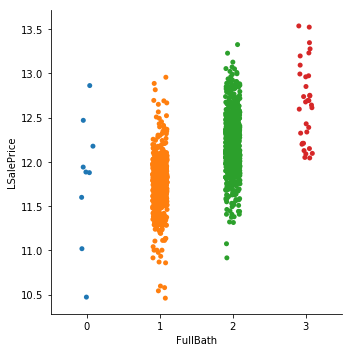

In [134]:
sns.catplot(x = 'FullBath', y='LSalePrice', data=train)
plt.show()

I add it as one of features.

In [152]:
features['FullBath'] = train['FullBath']

** * Age of house, when it sold**

From 'YearBuilt' and 'YrSold' variable, we can calcualte the age of house when it was sold.

In [156]:
train['AgeSold'] = train['YrSold'] - train['YearBuilt']

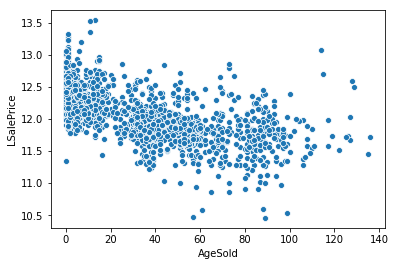

In [158]:
sns.scatterplot(x='AgeSold', y='LSalePrice', data = train)
plt.show()

The age of house and 'LSalePrice' are negatively correlated, and I add it to features.

In [160]:
features['AgeSold'] = train['AgeSold']

** * 'Neighborhood', a representive categorical variable **

According its neighborhood of house, the distributions of house price are changed.

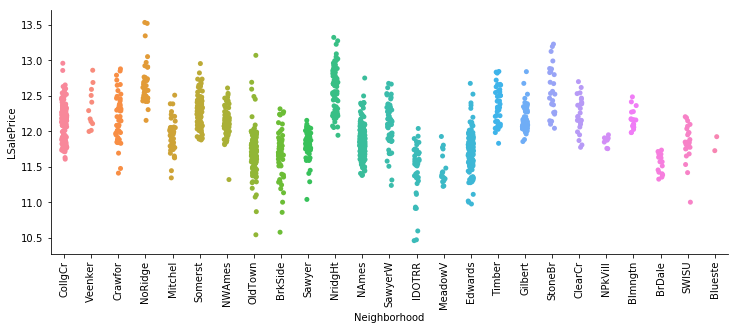

In [203]:
g = sns.catplot(x = 'Neighborhood', y='LSalePrice', data=train)
g.set_xticklabels(rotation=90)
g.fig.set_size_inches(12,4)
plt.show()

I get dummy variables of 'Neighborhood' and add them into features.

In [220]:
features = features.join(pd.get_dummies(train['Neighborhood']))